# Lab 9: initial boundary value problems (solutions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Exercise 1

### 1.1

In [19]:
def Euler_e(xm, tf, IC, BC):
    x0, t0 = 0, 0
    C = c * ht / hx**2

    # Build discretisations
    x = np.arange(x0, xm+hx, hx) # space
    t = np.arange(t0, tf+ht, ht) # time

    # Allocate memory
    u = np.zeros((t.shape[0], x.shape[0]))

    # Impose ICs
    u[0,1:-1] = IC[1:-1]

    for k in range(len(t)-1):
        u[k+1,1:-1] = C * (u[k,2::] + u[k,0:-2]) + (1-2*C) * u[k,1:-1]
        u = BC(u, k) # impose BCs

    return u

In [20]:
# Homogeneous Dirichlet BC (same heating from both sides)
def BC_D(u, k):
    u[k+1,0] = T_left
    u[k+1,-1] = T_right
    return u

tf, ht = 0.3, 0.001
xm, hx = 1, 0.05
c = 1

# For setting the BC
T_left, T_right = 0, 0

# initial condition
IC = 100 * np.ones(int(xm/hx)+1)

# Use the function
u_e = Euler_e(xm, tf, IC, BC_D)

# Transpose
u_e = np.transpose(u_e)

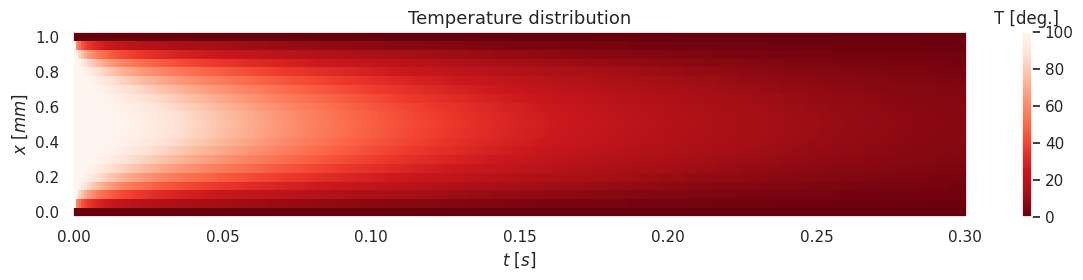

In [21]:
# plot
tt, xx = np.meshgrid(np.linspace(0, tf, u_e.shape[1]), np.linspace(0, xm, u_e.shape[0]))

fig, axes = plt.subplots(figsize=(16,3))

a = plt.pcolormesh(tt, xx, u_e, cmap = 'Reds_r', vmin = 0, vmax = 100);
plt.ylabel('$x\\ [mm]$', fontsize=12); plt.xlabel('$t\\ [s]$', fontsize=12);
plt.title('Temperature distribution', fontsize=13);

# Colourbar
clb = fig.colorbar(a)
fig.tight_layout(pad=1.2), fig.subplots_adjust(right=0.75);
clb.ax.set_title('T [deg.]');

### 1.2

In this case, for the left boundary, we got

$$
\frac{\partial T}{\partial x}=\alpha.
$$

The discretised version is

$$
T_{1}^k-T_{-1}^k = \alpha 2 \Delta x \rightarrow  T_{-1}^k = T_{1}^k-\alpha 2 \Delta x,
$$

and, from the discretised heat equation (using the explicit Euler's method),

$$
T_i^{k+1} = C T_{i+1}^{k} + C T_{i-1}^{k} + (1-2C) T_{i}^{k},
$$

where $C = c  h_t / h_x^2$. Replacing the discretised BC in the discretised heat equation, we get

$$
T_0^{k+1} = C T_{1}^{k} + C T_{-1}^{k} + (1-2C) T_{0}^{k} = C T_{1}^{k} + C (T_{1}^k-\alpha 2 \Delta x) + (1-2C) T_{0}^{k},
$$

Or simply

$$
T_0^{k+1} = 2C (T_{1}^{k} -\alpha \Delta x - T_{0}^{k}) + T_{0}^{k}.
$$

Likewise, we can show that, if the condition for the right boundary is

$$
\frac{\partial T}{\partial x}=\beta.
$$

we get

$$
T_N^{k+1} = 2C (T_{N-1}^{k} +\beta \Delta x - T_{N}^{k}) + T_{N}^{k}.
$$


In [22]:
# Homogeneous Dirichlet BC (same heating from both sides)
def BC_N(u, k):
    C = c * ht / hx**2
    u[k+1,0] = 2*C*(u[k,1]-alpha*hx-u[k,0]) + u[k,0] # left boundary
    u[k+1,-1] = 2*C*(u[k,-2]-alpha*hx-u[k,-1]) + u[k,-1] # right boundary
    return u

tf, ht = 0.3, 0.001
xm, hx = 1, 0.05
c = 1

# For setting the BC
alpha, beta = 1, -1

# initial condition
IC = 100 * np.ones(int(xm/hx)+1)

# Use the function
u_e = Euler_e(xm, tf, IC, BC_N)

# Transpose
u_e = np.transpose(u_e)

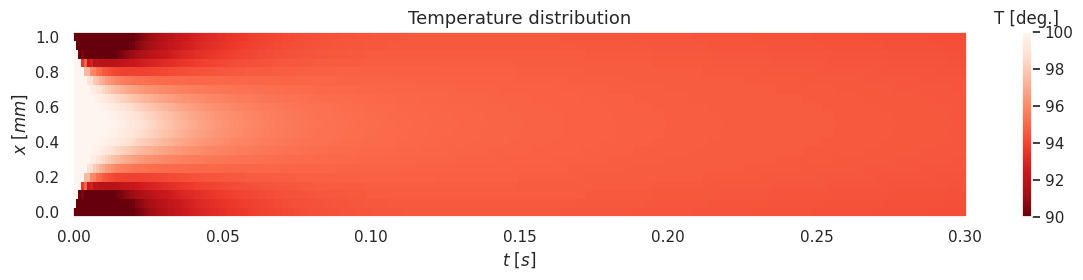

In [23]:
# plot
tt, xx = np.meshgrid(np.linspace(0, tf, u_e.shape[1]), np.linspace(0, xm, u_e.shape[0]))

fig, axes = plt.subplots(figsize=(16,3))

a = plt.pcolormesh(tt, xx, u_e, cmap = 'Reds_r', vmin = 90, vmax = 100);
plt.ylabel('$x\\ [mm]$', fontsize=12); plt.xlabel('$t\\ [s]$', fontsize=12);
plt.title('Temperature distribution', fontsize=13);

# Colourbar
clb = fig.colorbar(a)
fig.tight_layout(pad=1.2), fig.subplots_adjust(right=0.75);
clb.ax.set_title('T [deg.]');

### 1.3

In [7]:
# Homogeneous Dirichlet BC (same heating from both sides)
def BC_mixed(u, k):
    C = c * ht / hx**2
    u[k+1,0] = 2*C*(u[k,1]-alpha*hx-u[k,0]) + u[k,0] # left boundary
    u[k+1,-1] = T_right # right boundary
    return u

tf, ht = 0.3, 0.001
xm, hx = 1, 0.05
c = 1

# For setting the BC
alpha, T_right = 1, 0

# initial condition
IC = 100 * np.ones(int(xm/hx)+1)

# Use the function
u_e = Euler_e(xm, tf, IC, BC_mixed)

# Transpose
u_e = np.transpose(u_e)

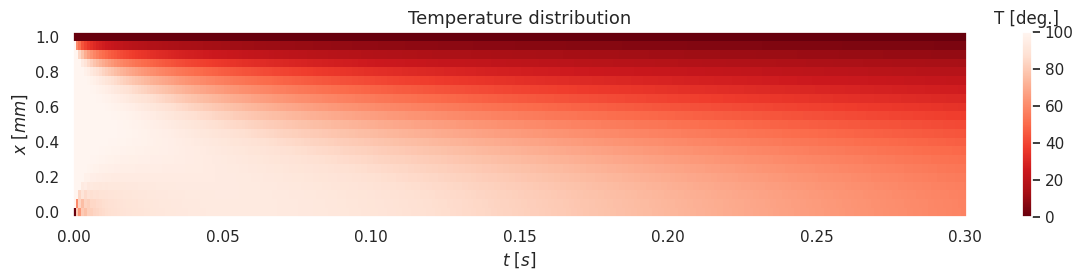

In [8]:
# plot
tt, xx = np.meshgrid(np.linspace(0, tf, u_e.shape[1]), np.linspace(0, xm, u_e.shape[0]))

fig, axes = plt.subplots(figsize=(16,3))

a = plt.pcolormesh(tt, xx, u_e, cmap = 'Reds_r', vmin = 0, vmax = 100);
plt.ylabel('$x\\ [mm]$', fontsize=12); plt.xlabel('$t\\ [s]$', fontsize=12);
plt.title('Temperature distribution', fontsize=13);

# Colourbar
clb = fig.colorbar(a)
fig.tight_layout(pad=1.2), fig.subplots_adjust(right=0.75);
clb.ax.set_title('T [deg.]');

## Exercise 2

### 2.1

In [9]:
# import functions from the lecture

def Euler_e2_d(x, y, t, c):
    hx, hy, ht = x[1]-x[0], y[1]-y[0], t[1]-t[0]
    xx, yy = np.meshgrid(x, y)
    u = np.zeros((t.shape[0],x.shape[0],y.shape[0]))

    u[0,:,:] = IC(xx,yy)
    u[0,:,:] = BC(u[0,:,:])

    for k in range(len(t)-1):
        u[k+1,1:-1,1:-1] = u[k,1:-1,1:-1] + ht * f(u[k,:,:], hx, hy, c)
        u[k+1,:,:] = BC(u[k+1,:,:])
    return u



def f(u, hx, hy, c):
    uxx = (u[0:-2,1:-1]+u[2::,1:-1]-2*u[1:-1,1:-1]) / hx**2
    uyy = (u[1:-1,0:-2]+u[1:-1,2::]-2*u[1:-1,1:-1]) / hy**2
    return c*(uxx+uyy)



def anim_2D(u):
    fig = plt.figure(figsize=(5, 5)); ax = plt.subplot() # create figure and axes handle
    quad = plt.pcolormesh(u[0]); plt.axis('image') # initial plot
    ax.set_xticks([]); ax.set_yticks([]); clb = plt.colorbar();

    def init():
        quad.set_array([])
        return quad

    def animate(iter):
        quad.set_array(u[iter,:,:].ravel())
        return quad

    anim = animation.FuncAnimation(fig, animate, frames=int(u.shape[0]),
                                   interval=1, blit=False, repeat=False)
    plt.close(anim._fig)
    return anim


In [10]:
import matplotlib.animation as animation
from IPython.display import HTML
from skimage.color import rgb2gray
from PIL import Image
import requests
from io import BytesIO

# Get image from url
url = 'https://upload.wikimedia.org/wikipedia/commons/6/61/Rubiks_cube_solved.jpg'
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Open image
Im = Image.open(BytesIO(response.content))

# Convert to grayscale
Im = rgb2gray(np.array(Im))

def IC(x,y): # set the image as IC
    return Im

def BC(u): # Dirichlet BCs
    u[-1,:]=0
    u[0,:]=0
    u[:,-1]=0
    u[:,0]=0
    return u

t0, tf, ht = 0, 1, 0.001
sx, sy = Im.shape
c = 50

t = np.arange(t0, tf+ht, ht)
x = np.arange(0, sx)
y = np.arange(0, sy)

u = Euler_e2_d(x, y, t, c)

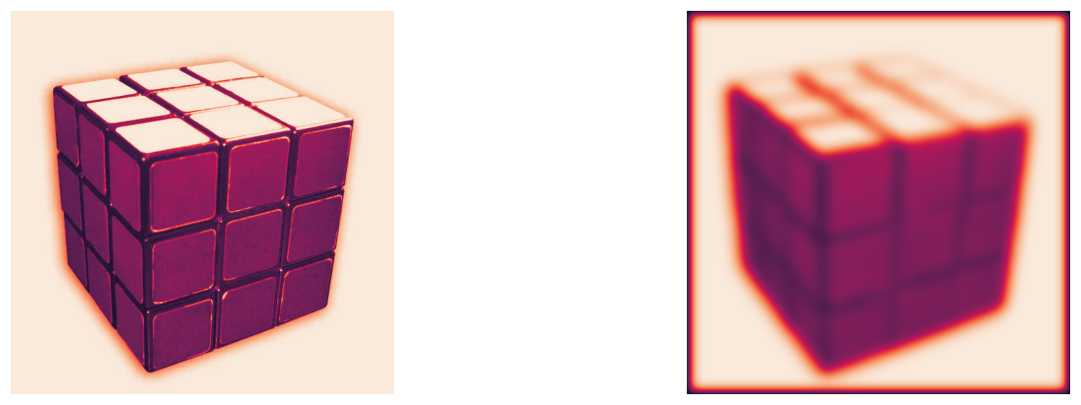

In [11]:
# plot
fig = plt.figure(figsize=(16, 5))
sns.set_style("dark")

plt.subplot(1, 2, 1)
plt.imshow(Im); plt.xticks([]);plt.yticks([]);

plt.subplot(1, 2, 2)
plt.imshow(u[-1]); plt.xticks([]);plt.yticks([]);

In [12]:
# movie
ani = anim_2D(u)
HTML(ani.to_html5_video())

Note that the animation is upside down since we are plotting the array as such, and not as an image (the image plots were shown using the function image to correct for this).

### 2.2.

In [13]:
def RK4_2_d(x, y, t, c):
    hx, hy, ht = x[1]-x[0], y[1]-y[0], t[1]-t[0]
    xx, yy = np.meshgrid(x,y)
    u = np.zeros((t.shape[0],x.shape[0],y.shape[0]))

    u[0,:,:] = IC(xx,yy)
    u[0,:,:] = BC(u[0,:,:])

    for k in range(len(t)-1):

        uu = np.zeros((x.shape[0],y.shape[0])) # auxiliary array to deal with mismatches

        K1 = ht * f(u[k,:,:], hx, hy, c); uu[1:-1,1:-1] = K1
        K2 = ht * f(u[k,:,:] + uu/2, hx, hy, c); uu[1:-1,1:-1] = K2
        K3 = ht * f(u[k,:,:] + uu/2, hx, hy, c); uu[1:-1,1:-1] = K3
        K4 = ht * f(u[k,:,:] + uu, hx, hy, c);

        u[k+1,1:-1,1:-1] = u[k,1:-1,1:-1] + (K1+2*K2+2*K3+K4)/6
        u[k+1,:,:] = BC(u[k+1,:,:])
    return u

In [14]:
u_rk = RK4_2_d(x, y, t, c)
ani_rk = anim_2D(u_rk)
HTML(ani_rk.to_html5_video())

## Exercise 3

### 3.1.

A. Although the definition looks like a forward finite difference, since the time step is halved, it is still $O(\Delta t^2)$. Note that it is evaluated in $t_{k+\frac{1}{2}}$ and not $t_k$.

B. Using the centred $O(\Delta x^2)$ finite differences, we find


$$u_{xx}(t_{k+\frac{1}{2}};x_i)\approx \frac{1}{2} \left(\frac{u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}}{\Delta x^2}+\frac{u_{i+1}^{k}-2u_{i}^{k}+u_{i-1}^{k}}{\Delta x^2} \right).$$


C. Using the first two points, we obtain:


$$
\frac{u_i^{k+1}-u_i^{k}}{\Delta t}=\frac{c}{2} \left( \frac{u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}}{\Delta x^2}+\frac{u_{i+1}^{k}-2u_{i}^{k}+u_{i-1}^{k}}{\Delta x^2} \right).
$$


Rearranging:


$$
- Cu_{i+1}^{k+1} + u_i^{k+1} (2C+1) - Cu_{i-1}^{k+1} - Cu_{i+1}^{k} + u_i^{k} (2C-1) - Cu_{i-1}^{k}=0,
$$


where



$$
C=\frac{c \Delta t}{2 \Delta x^2}.
$$  


The stencil is then:

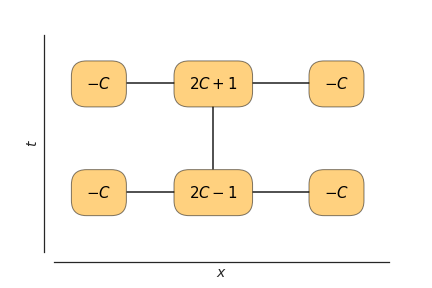

D. Only the terms with exponent $k+1$ are unknown to us, and therefore the only impacting on the system matrix. Those with exponent $k$ will contribute to the independent vector.

\begin{align*}
\begin{bmatrix}
   2C+1 & -C & 0 & 0& 0 & \dots & 0\\
   -C & 2C+1 & -C & 0 & 0 &\dots& 0\\
   0&\vdots & \ddots & \ddots  & \ddots  & \ddots & 0\\
    0&0 & \dots & \dots & \dots \\
    0 & 0 & 0 & 0& \dots & -C & 2C+1
\end{bmatrix} \begin{bmatrix}
y_{1}^{k+1} \\ y_2^{k+1} \\ \vdots \\  y_{n-1}^{k+1}
\end{bmatrix} =\begin{bmatrix}
   1-2C & C & 0 & 0& 0 & \dots & 0\\
   C & 1-2C & C & 0 & 0 &\dots& 0\\
   0&\vdots & \ddots & \ddots  & \ddots  & \ddots & 0\\
    0&0 & \dots & \dots & \dots \\
    0 & 0 & 0 & 0& \dots & C & 1-2C
\end{bmatrix} \begin{bmatrix}
y_{1}^{k} \\ y_2^{k} \\ \vdots \\  y_{n-1}^{k}
\end{bmatrix}+\begin{bmatrix}
C\alpha \\ 0 \\ \vdots \\ 0 \\  C \beta
\end{bmatrix}.
\end{align*}


Note that the last vector just imposes Dirichlet's BCs.


### 3.2

In [15]:
import scipy.sparse as sps

def Crank_Nicolson(x, t, alpha, beta, IC, c):
    hx, ht = x[1]-x[0], t[1]-t[0]
    sx, st = x.shape[0], t.shape[0]
    C = c * ht / 2 / hx**2

    u = np.zeros((st, sx)) # allocate memory
    u[0,:] = IC(x) # impose ICs
    u[:,0] = alpha; u[:,-1] = beta; # impose BCs

    # left hand side matrix (A)
    d0 = (2 * C + 1) * np.ones(sx-2)
    d1 = -C * np.ones(sx-3)
    A = sps.diags([d0,d1,d1], [0,1,-1], format='csr')

    # right hand side matrix (K)
    d0 = (1 - 2 * C) * np.ones(sx-2)
    d1 = C * np.ones(sx-3)
    K = sps.diags([d0,d1,d1], [0,1,-1], format='csr')

    for k in range(len(t)-1):
        b = K @ np.transpose(u[k,1:-1])
        b[0] = b[0] + C * alpha
        b[-1] = b[-1] + C * beta
        u[k+1,1:-1] = sps.linalg.spsolve(A, b) # solve system of equations
    return u



# from the lecture notes

def Euler_i(x, t, alpha, beta, IC, c):
    hx, ht = x[1]-x[0], t[1]-t[0]
    sx, st = x.shape[0], t.shape[0]
    C = c * ht / hx**2
    u = np.zeros((st, sx)) # allocate memory
    u[0,:] = IC(x) # impose ICs
    u[:,0] = alpha; u[:,-1] = beta; # impose BCs
    d0 = (2 * C + 1) * np.ones(sx-2)
    d1 = -C * np.ones(sx-3)
    A = sps.diags([d0,d1,d1], [0,1,-1], format='csr')
    for k in range(len(t)-1):
        b = u[k,1:-1]
        b[0] = b[0] + C*alpha
        b[-1] = b[-1] + C*beta
        u[k+1,1:-1] = sps.linalg.spsolve(A, b) # solve system of equations
    return u

def Euler_e(x, t, alpha, beta, IC, c):
    hx, ht = x[1] - x[0], t[1] - t[0]
    C = c * ht / hx**2
    u = np.zeros((t.shape[0], x.shape[0])) # allocate memory
    u[0,:] = IC(x) # impose ICs
    u[:,0] = alpha; u[:,-1] = beta; # impose BCs
    for k in range(len(t)-1):
        u[k+1,1:-1] = C * (u[k,2::] + u[k,0:-2]) + (1-2*C) * u[k,1:-1]
    return u

In [16]:
def sol_a(x,t): # analytical solution
    Nx, Nt = x.shape[0], t.shape[0]
    u = np.zeros((Nt,Nx)) # allocate memory
    xx, tt = np.meshgrid(x, t)
    for kk in range(1, 5000):
        u += 4/np.pi*np.sin(xx*np.pi*(2*kk-1))/(2*kk-1)*np.exp(-(2*kk-1)**2*np.pi**2*tt)
    return u

t0, tf, ht = 0, .1, 0.0013
x0, xn, hx = 0, 1, 0.05
c, alpha, beta = 1, 0, 0 # c & BCs (left and right)

# initial condition
def IC(x):
    return 0 * x + 100

x = np.arange(x0, xn+hx, hx) # space discretisation
t = np.arange(t0, tf+ht, ht) # time discretisation

u_a = 100 * sol_a(x, t) # analytical solution
u_e = Euler_e(x, t, alpha, beta, IC, c) # explicit Euler's method
u_i = Euler_i(x, t, alpha, beta, IC, c) # implicit Euler's method
u_cn = Crank_Nicolson(x, t, alpha, beta, IC, c) # Crank - Nicolson

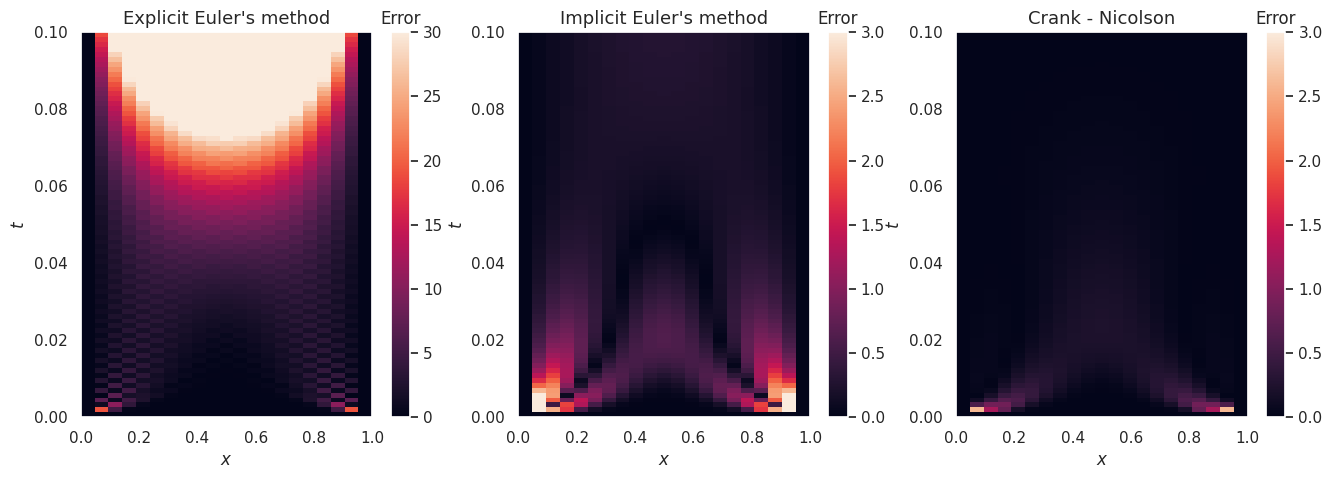

In [17]:
# plot
plt.figure(figsize=(16,5))
xx, tt = np.meshgrid(np.linspace(x0, xn, x.shape[0]+1), np.linspace(t0, tf, t.shape[0]+1))

plt.subplot(1,3,1)
plt.pcolormesh(xx, tt, np.abs(u_e-u_a),vmin=0,vmax=30);
plt.xlabel('$x$', fontsize=12);plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Error'); plt.title('Explicit Euler\'s method', fontsize=13)

plt.subplot(1,3,2)
plt.pcolormesh(xx, tt, np.abs(u_i-u_a), vmin=0, vmax=3);
plt.xlabel('$x$', fontsize=12);plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Error'); plt.title('Implicit Euler\'s method', fontsize=13);

plt.subplot(1,3,3)
plt.pcolormesh(xx, tt, np.abs(u_cn-u_a), vmin=0, vmax=3);
plt.xlabel('$x$', fontsize=12);plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Error'); plt.title('Crank - Nicolson', fontsize=13);